In [4]:
!pip3 install --upgrade pix2tex[cli] PyMuPDF

  Using cached pymupdf-1.26.5-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (3.4 kB)
Using cached pymupdf-1.26.5-cp39-abi3-manylinux_2_28_x86_64.whl (24.1 MB)


In [5]:
from pathlib import Path
import fitz  # PyMuPDF
from PIL import Image
import numpy as np

def extract_images_from_pdf(pdf_path, output_dir="test_images", dpi=300):
    """Extract images from PDF with high quality"""
    pdf_path = Path(pdf_path)
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)
    
    images = []
    doc = fitz.open(pdf_path)
    
    for page_num in range(len(doc)):
        page = doc[page_num]
        # Render page to image with high DPI
        mat = fitz.Matrix(dpi/72, dpi/72)
        pix = page.get_pixmap(matrix=mat)
        
        # Convert to PIL Image
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        
        # Save image
        img_path = output_dir / f"{pdf_path.stem}_page_{page_num+1}.png"
        img.save(img_path, "PNG")
        images.append(img_path)
        print(f"Extracted page {page_num+1}: {img_path}")
    
    doc.close()
    return images

# Find PDF files in tests_pdfs directory (note the 's')
pdf_files = list(Path("tests_pdfs").glob("*.pdf"))

print(f"\nFound {len(pdf_files)} PDF files:")
for pdf in pdf_files:
    print(f"  - {pdf}")
extract_images_from_pdf("tests_pdfs/t1.pdf")
extract_images_from_pdf("tests_pdfs/t3.pdf")


Found 5 PDF files:
  - tests_pdfs/pdf1.pdf
  - tests_pdfs/t3.pdf
  - tests_pdfs/pdf2.pdf
  - tests_pdfs/t1.pdf
  - tests_pdfs/t2.pdf
Extracted page 1: test_images/t1_page_1.png
Extracted page 2: test_images/t1_page_2.png
Extracted page 3: test_images/t1_page_3.png
Extracted page 1: test_images/t3_page_1.png
Extracted page 2: test_images/t3_page_2.png


[PosixPath('test_images/t3_page_1.png'),
 PosixPath('test_images/t3_page_2.png')]

In [6]:
from PIL import Image
from pix2tex.cli import LatexOCR
from IPython.display import display, Math

model = LatexOCR()

for img in list(Path("test_images").glob("*.png")):
    image = Image.open(img)
    print(f"Processing image: {img}")
    text = model(image)
    print(f"Extracted LaTeX: {text}")
    display(Math(text))

Processing image: test_images/t3_page_2.png


ValueError: height and width must be > 0

In [10]:
from pathlib import Path
from IPython.display import display, Math
import IPython.display
from pix2tex.cli import LatexOCR
from PIL import Image

model = LatexOCR()

Processing image: test_output/isolate_formula/detection6.jpg


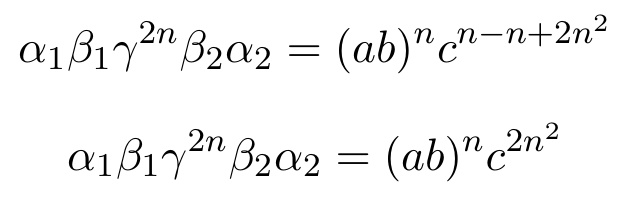

Extracted LaTeX: \begin{array}{c}{{Q_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\implies\left({a b}\right)^{n}c^{n-n+2n^{2}}}}\\ {{\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad

<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection7.jpg


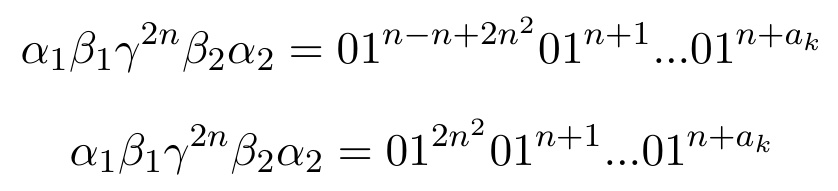

Extracted LaTeX: \begin{array}{c}{{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\Longrightarrow(\displaystyle0){}^{n-n+2n^{2}}(\displaystyle0){}^{n+1}...0{}^{1}}}\\ {{\displaystyle Q_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}{\cal Q}_{2}\ =0{}^{2n^{2}}(\displaystyle01^{n+a_{k}})}}\end{array}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection8.jpg


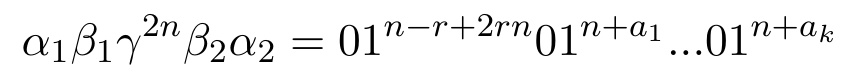

Extracted LaTeX: \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\mathrm{0}{\bf1}^{n+a_{1}}...\mathrm{0}{\bf1}^{n+a_{k}}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection4.jpg


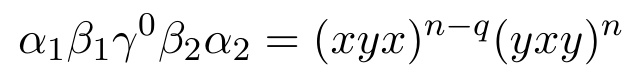

Extracted LaTeX: {\cal Q}(t)\partial_{1}\cap\overset{0}{\sim}\emptyset\arg2\longrightarrow\left(\mathcal{D}\mathcal{A}\right)^{n-q}\left(\mathcal{U}\mathcal{A}\mathcal{U}\right)^{n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection5.jpg


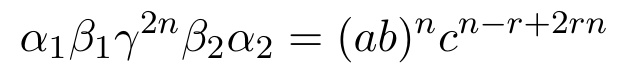

Extracted LaTeX: {\cal Q}_{1}{\beta}_{1}{\gamma}^{2n}{\beta}_{2}{\cal Q}_{2}\longrightarrow\left({\cal Q}{\cal0}\right)^{n}{\cal C}^{n-r+2r n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection.jpg


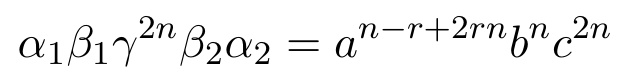

Extracted LaTeX: {\cal Q}_{1}{\beta}_{1}{\gamma}^{2n}{\beta}_{2}{\cal Q}_{2}\underline{{{\mu}}}\longrightarrow\underline{{{a}}}^{n-r+2r n}{\beta}_{~~~~}^{n}{\cal C}^{2n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection3.jpg


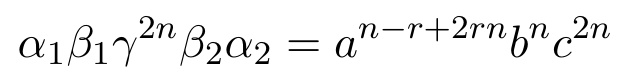

Extracted LaTeX: {\cal Q}_{1}\beta_{1}\gamma^{2n}\beta_{2}{\cal Q}_{2}\longrightarrow Q^{n-r+2r n}\theta_{~~~~~}^{n}c^{2n}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection9.jpg


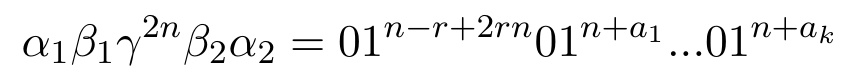

Extracted LaTeX: \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}=01^{n-r+2r n}\mathrm{0}{\bf1}^{n+a_{1}}...\mathrm{0}{\bf1}^{n+a_{k}}


<IPython.core.display.Math object>

Processing image: test_output/isolate_formula/detection2.jpg


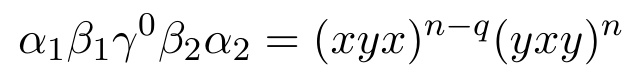

Extracted LaTeX: {\cal Q}(t)\partial_{1}\cap\overset{0}{\sim}\operatorname{\operatorname{paret}}\longrightarrow\overset{\leftarrow}{\longrightarrow}\Big(\mathcal{D}\mathcal{D}\mathcal{D}\Big)^{n-q}\Big(\mathcal{U}\mathcal{D}\mathcal{U}\Big)^{n}


<IPython.core.display.Math object>

In [11]:
for img in list(Path("test_output/isolate_formula").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(IPython.display.Image(img))
    image = Image.open(img)
    res = model(image)
    print(f"Extracted LaTeX: {res}")
    display(Math(res))

Processing image: test_output1/Formula/detection4.jpg


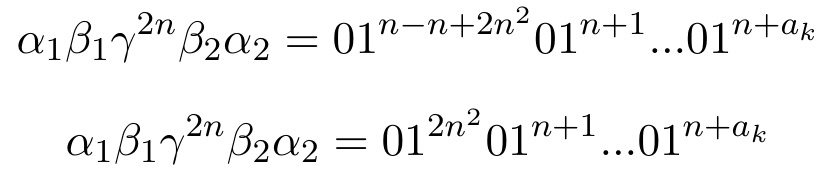

Extracted LaTeX: \begin{array}{c}{{Q_{1}\beta_{1}\gamma^{2n}\beta_{2}Q x_{2}=0{1}^{n-n+2n^{2}}(){1}^{n+1}...0{1}^{n+a_{k}}}}\\ {{\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad}}\\ {{\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad}}\\ {{\qquad\qquad\qquad\qquad}}&{{\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad

<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection.jpg


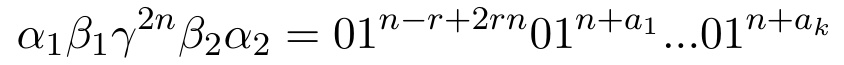

Extracted LaTeX: \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\equiv01^{n-r+2r n}\mathrm{0}{\bf1}^{n+a_{1}}...\mathrm{0}{\bf l}^{n+a_{k}}


<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection3.jpg


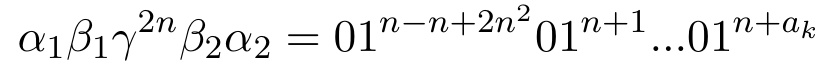

Extracted LaTeX: \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}\alpha_{2}\ =01^{n-n+2n^{2}}()1^{n+1}...01^{n+a_{k}}


<IPython.core.display.Math object>

Processing image: test_output1/Formula/detection2.jpg


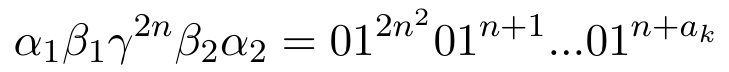

Extracted LaTeX: \alpha_{1}\beta_{1}\gamma^{2n}\beta_{2}{\it Q}_{2}\nonumber=\mathrm{0}{\bf l}^{2n^{2}}(0{\bf l}^{n+1}...0{\bf l}^{n+a_{k}}


<IPython.core.display.Math object>

In [12]:
for img in list(Path("test_output1/Formula").glob("*.jpg")):
    print(f"Processing image: {img}")
    display(IPython.display.Image(img))
    image = Image.open(img)
    res = model(image)
    print(f"Extracted LaTeX: {res}")
    display(Math(res))